<h1 style="text-align:center">TEAM SQUEEM</h1>
<img align="center" src="../squeemos_blk.png" width=200 height=200 />

In [1]:
# Aeon Williams
# 12/3/2020

from bae0n_utils import *
FitCellsToWindow()

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import datetime
from PIL import Image, ImageDraw
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import os
import shutil
import glob
from mpl_toolkits.basemap import Basemap
%matplotlib inline
plt.ioff()

from squeemtools.math import FCM

ModuleNotFoundError: No module named 'squeemtools'

# Comparing Kmeans & FCM

In [2]:
max_iter = 1000
tol = 10e-7

## Helper Functions

In [3]:
# Evaluate how similar two lists are
def similarity_metric(ls1, ls2):
    matching_value_count = 0
    for i in range(len(ls1)):
        if ls1[i] == ls2[i]:
            matching_value_count += 1
    return matching_value_count / float(len(ls1)) * 100

## Data Loading

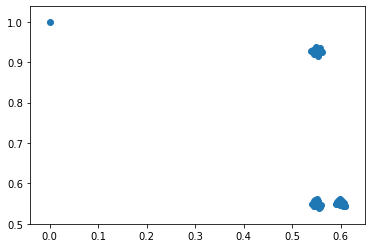

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       101 non-null    float64
 1   Y       101 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


None

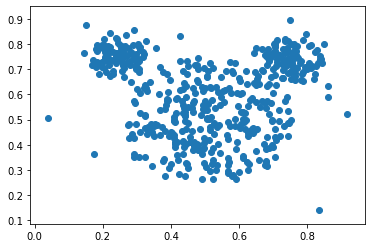

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       500 non-null    float64
 1   Y       500 non-null    float64
 2   Loc     500 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


None

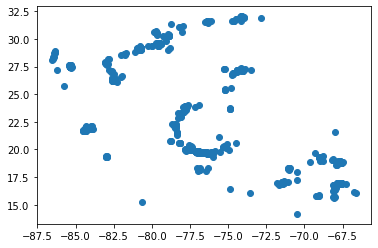

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 122796 to 123486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       691 non-null    float64
 1   Y       691 non-null    float64
dtypes: float64(2)
memory usage: 16.2 KB


None

In [4]:
mouse = pd.read_csv('./sample02.csv', sep=' ', names=['X', 'Y', 'Loc'])
blobs = pd.read_csv('./sample01.csv', usecols=[1,2], names=['X', 'Y'])

year, month, day, hour, minute = 2017,9,8,20,30
mi = 30
ln = pd.read_csv('./ATL_17_11_Irma_WWLLN_Locations.txt',header=None,names=     
                 ["Year","Month","Day","Hour","Min","Sec","Lat",
                  "Long","Dist_East_West","Dist_North_South"],
                 low_memory=False,sep=' ')
ln['Distance'] = np.sqrt(ln['Dist_East_West'] ** 2 + 
                         ln['Dist_North_South'] ** 2)
current_ln = ln[(ln['Month'] == month) & (ln['Day'] == day) & 
                (ln['Hour'] == hour) & (ln['Min'] >= minute) & 
                (ln['Min'] < minute + mi)].copy()
current_ln = current_ln.rename(columns={'Lat':'Y', 'Long':'X'})
current_ln = current_ln[['X','Y']]

dfs = {'blobs':blobs, 'mouse':mouse, 'ln':current_ln}

for name, df in dfs.items():
    figsize=(5,5)
    plt.scatter(df['X'], df['Y'])
    plt.show()
    display(df.info())

Raw Comparisons: 




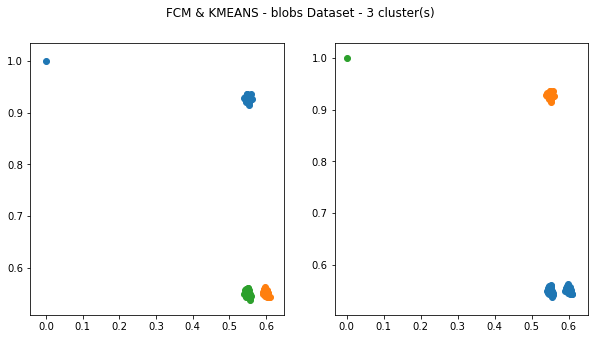

,X,Y,FCM,KMEANS
0,0.000000,1.000000,0,2
1,0.605470,0.547282,1,0
2,0.590862,0.549582,1,0
3,0.548940,0.551625,2,0
4,0.603320,0.550609,1,0
...,...,...,...,...
96,0.598390,0.562372,1,0
97,0.554804,0.545750,2,0
98,0.593299,0.552969,1,0
99,0.544953,0.544810,2,0


The predicted values are 0.0% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.573378,0.550446,0.547001,0.926499,0.376977
1,0.550835,0.925985,0.599941,0.551824,0.377370
2,0.000000,1.000000,0.549374,0.551188,0.709397


Adjusted Comparisons: 


Center mappings:  [[0, 1], [1, 0], [2, 0]]


,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,0.000000,1.000000,0,2,1
1,0.605470,0.547282,1,0,0
2,0.590862,0.549582,1,0,0
3,0.548940,0.551625,2,0,0
4,0.603320,0.550609,1,0,0
...,...,...,...,...,...
96,0.598390,0.562372,1,0,0
97,0.554804,0.545750,2,0,0
98,0.593299,0.552969,1,0,0
99,0.544953,0.544810,2,0,0


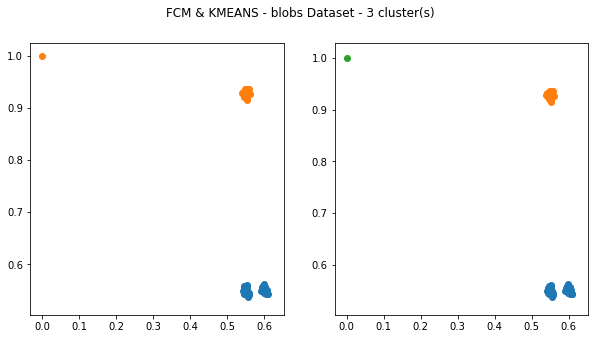

,X,Y,ADJUSTED_FCM,KMEANS
0,0.000000,1.000000,1,2
1,0.605470,0.547282,0,0
2,0.590862,0.549582,0,0
3,0.548940,0.551625,0,0
4,0.603320,0.550609,0,0
...,...,...,...,...
96,0.598390,0.562372,0,0
97,0.554804,0.545750,0,0
98,0.593299,0.552969,0,0
99,0.544953,0.544810,0,0


,ADJUSTED_FCM,KMEANS
count,101.000000,101.000000
mean,0.316832,0.326733
std,0.467562,0.492116
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,2.000000


The predicted values are 99.00990099009901% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.573378,0.550446,0.549374,0.551188,0.024016
1,0.550835,0.925985,0.547001,0.926499,0.003868
2,0.000000,1.000000,NaN,NaN,NaN


--------------------------------------------------------------
Raw Comparisons: 




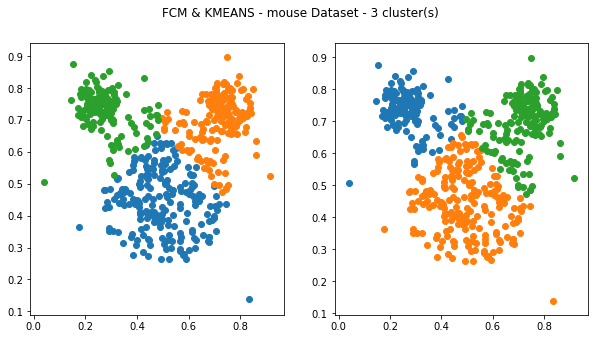

,X,Y,FCM,KMEANS
0,0.456601,0.432806,0,1
1,0.611378,0.528625,0,1
2,0.450299,0.711606,2,0
3,0.639015,0.460744,0,1
4,0.628957,0.323470,0,1
...,...,...,...,...
495,0.151506,0.876586,2,0
496,0.860308,0.633833,1,2
497,0.862083,0.591805,1,2
498,0.916030,0.523391,1,2


The predicted values are 0.0% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.273141,0.734209,0.499028,0.437901,0.372591
1,0.492566,0.447994,0.722163,0.704352,0.344143
2,0.713889,0.694412,0.269878,0.728526,0.445319


Adjusted Comparisons: 


Center mappings:  [[0, 1], [1, 2], [2, 0]]


,X,Y,Loc,FCM,KMEANS,ADJUSTED_FCM
0,0.456601,0.432806,Head,0,1,1
1,0.611378,0.528625,Head,0,1,1
2,0.450299,0.711606,Head,2,0,0
3,0.639015,0.460744,Head,0,1,1
4,0.628957,0.323470,Head,0,1,1
...,...,...,...,...,...,...
495,0.151506,0.876586,Noise,2,0,0
496,0.860308,0.633833,Noise,1,2,2
497,0.862083,0.591805,Noise,1,2,2
498,0.916030,0.523391,Noise,1,2,2


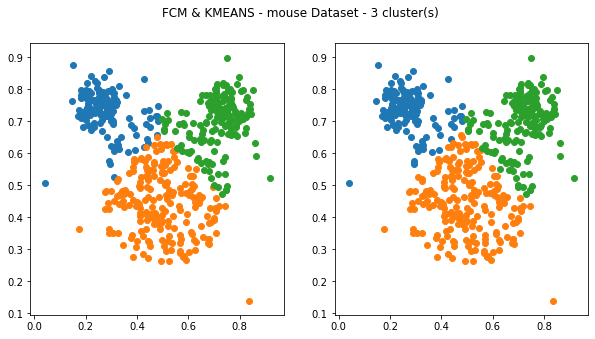

,X,Y,ADJUSTED_FCM,KMEANS
0,0.456601,0.432806,1,1
1,0.611378,0.528625,1,1
2,0.450299,0.711606,0,0
3,0.639015,0.460744,1,1
4,0.628957,0.323470,1,1
...,...,...,...,...
495,0.151506,0.876586,0,0
496,0.860308,0.633833,2,2
497,0.862083,0.591805,2,2
498,0.916030,0.523391,2,2


,ADJUSTED_FCM,KMEANS
count,500.00000,500.000000
mean,1.04600,1.058000
std,0.75963,0.756161
min,0.00000,0.000000
25%,0.00000,0.000000
50%,1.00000,1.000000
75%,2.00000,2.000000
max,2.00000,2.000000


The predicted values are 98.8% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.273141,0.734209,0.269878,0.728526,0.006553
1,0.492566,0.447994,0.499028,0.437901,0.011985
2,0.713889,0.694412,0.722163,0.704352,0.012933


--------------------------------------------------------------
Raw Comparisons: 




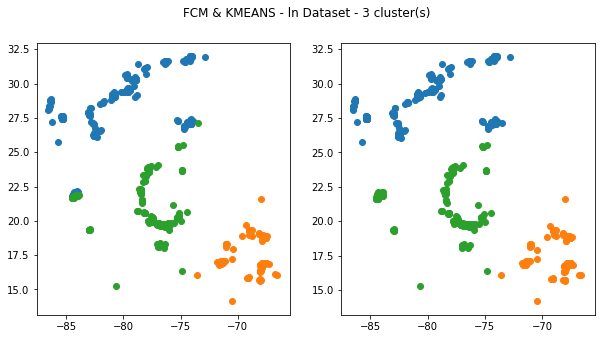

,X,Y,FCM,KMEANS
122796,-79.5609,29.5326,0,0
122797,-71.0343,18.1271,1,1
122798,-85.4239,27.5546,0,0
122799,-85.3559,27.5989,0,0
122800,-76.2114,19.6181,2,2
...,...,...,...,...
123482,-78.1610,20.5861,2,2
123483,-84.5211,21.7879,0,2
123484,-84.3567,21.7220,2,2
123485,-79.8456,30.6004,0,0


The predicted values are 96.81620839363242% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,-80.093147,28.635145,-81.080045,28.329356,1.033186
1,-69.081470,17.509929,-69.198095,17.794993,0.307998
2,-78.155962,20.586760,-77.184404,20.546067,0.972411


Adjusted Comparisons: 


Center mappings:  [[0, 0], [1, 1], [2, 2]]


,index,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,122796,-79.5609,29.5326,0,0,0
1,122797,-71.0343,18.1271,1,1,1
2,122798,-85.4239,27.5546,0,0,0
3,122799,-85.3559,27.5989,0,0,0
4,122800,-76.2114,19.6181,2,2,2
...,...,...,...,...,...,...
686,123482,-78.1610,20.5861,2,2,2
687,123483,-84.5211,21.7879,0,2,0
688,123484,-84.3567,21.7220,2,2,2
689,123485,-79.8456,30.6004,0,0,0


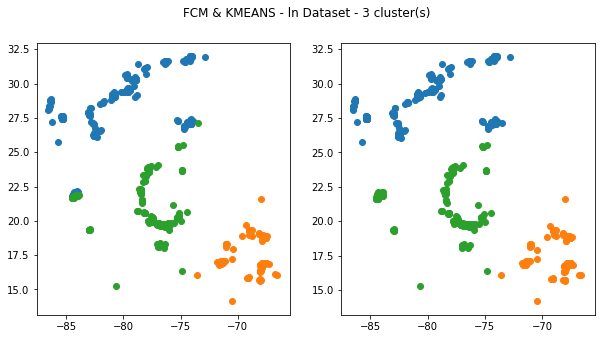

,X,Y,ADJUSTED_FCM,KMEANS
0,-79.5609,29.5326,0,0
1,-71.0343,18.1271,1,1
2,-85.4239,27.5546,0,0
3,-85.3559,27.5989,0,0
4,-76.2114,19.6181,2,2
...,...,...,...,...
686,-78.1610,20.5861,2,2
687,-84.5211,21.7879,0,2
688,-84.3567,21.7220,2,2
689,-79.8456,30.6004,0,0


,ADJUSTED_FCM,KMEANS
count,691.000000,691.000000
mean,0.905933,0.963821
std,0.904807,0.908969
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,2.000000,2.000000


The predicted values are 96.81620839363242% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,-80.093147,28.635145,-81.080045,28.329356,1.033186
1,-69.081470,17.509929,-69.198095,17.794993,0.307998
2,-78.155962,20.586760,-77.184404,20.546067,0.972411


--------------------------------------------------------------
Raw Comparisons: 




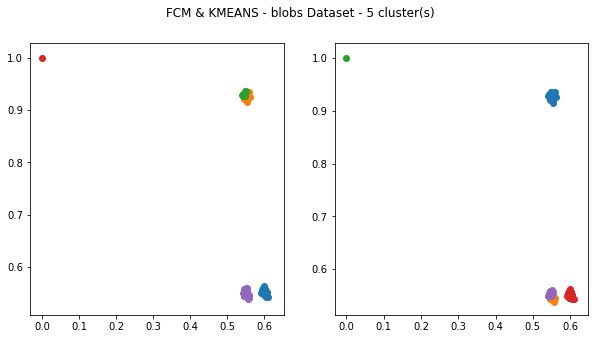

,X,Y,FCM,KMEANS
0,0.000000,1.000000,3,2
1,0.605470,0.547282,0,3
2,0.590862,0.549582,0,3
3,0.548940,0.551625,4,4
4,0.603320,0.550609,0,3
...,...,...,...,...
96,0.598390,0.562372,0,3
97,0.554804,0.545750,4,1
98,0.593299,0.552969,0,3
99,0.544953,0.544810,4,1


The predicted values are 20.792079207920793% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.550835,0.925985,6.012766e-01,0.550835,0.378526
1,0.552796,0.545326,5.527282e-01,0.924077,0.378751
2,0.000000,1.000000,5.468783e-01,0.929165,0.551447
3,0.601248,0.550872,5.449795e-07,1.000000,0.750476
4,0.548898,0.553960,5.506135e-01,0.550153,0.004176


Adjusted Comparisons: 


Center mappings:  [[0, 3], [1, 0], [2, 0], [3, 2], [4, 4]]


,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,0.000000,1.000000,3,2,2
1,0.605470,0.547282,0,3,3
2,0.590862,0.549582,0,3,3
3,0.548940,0.551625,4,4,4
4,0.603320,0.550609,0,3,3
...,...,...,...,...,...
96,0.598390,0.562372,0,3,3
97,0.554804,0.545750,4,1,4
98,0.593299,0.552969,0,3,3
99,0.544953,0.544810,4,1,4


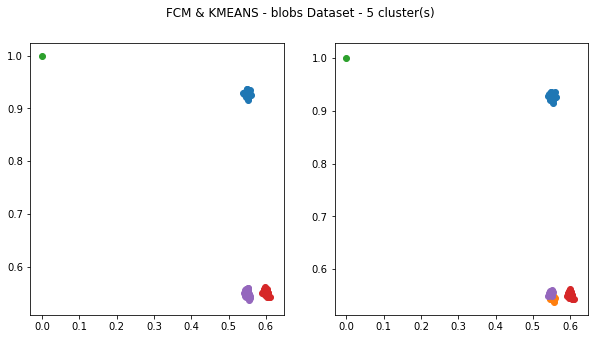

,X,Y,ADJUSTED_FCM,KMEANS
0,0.000000,1.000000,2,2
1,0.605470,0.547282,3,3
2,0.590862,0.549582,3,3
3,0.548940,0.551625,4,4
4,0.603320,0.550609,3,3
...,...,...,...,...
96,0.598390,0.562372,3,3
97,0.554804,0.545750,4,1
98,0.593299,0.552969,3,3
99,0.544953,0.544810,4,1


,ADJUSTED_FCM,KMEANS
count,101.000000,101.000000
mean,2.445545,1.940594
std,1.693961,1.598886
min,0.000000,0.000000
25%,0.000000,0.000000
50%,3.000000,3.000000
75%,4.000000,3.000000
max,4.000000,4.000000


The predicted values are 83.16831683168317% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.550835,0.925985,5.468783e-01,0.929165,5.076145e-03
1,0.552796,0.545326,NaN,NaN,NaN
2,0.000000,1.000000,5.449795e-07,1.000000,6.421325e-07
3,0.601248,0.550872,6.012766e-01,0.550835,4.723131e-05
4,0.548898,0.553960,5.506135e-01,0.550153,4.175940e-03


--------------------------------------------------------------
Raw Comparisons: 




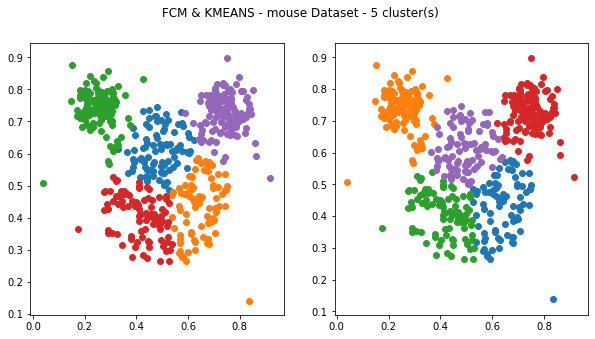

,X,Y,FCM,KMEANS
0,0.456601,0.432806,3,2
1,0.611378,0.528625,1,0
2,0.450299,0.711606,0,4
3,0.639015,0.460744,1,0
4,0.628957,0.323470,1,0
...,...,...,...,...
495,0.151506,0.876586,2,1
496,0.860308,0.633833,4,3
497,0.862083,0.591805,4,3
498,0.916030,0.523391,4,3


The predicted values are 0.4% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.640002,0.429857,0.484740,0.601198,0.231223
1,0.253380,0.739848,0.639176,0.434885,0.491774
2,0.409192,0.408640,0.249019,0.748047,0.375304
3,0.744696,0.726792,0.420097,0.411988,0.452179
4,0.493000,0.611256,0.744531,0.733355,0.279599


Adjusted Comparisons: 


Center mappings:  [[0, 4], [1, 0], [2, 1], [3, 2], [4, 3]]


,X,Y,Loc,FCM,KMEANS,ADJUSTED_FCM
0,0.456601,0.432806,Head,3,2,2
1,0.611378,0.528625,Head,1,0,0
2,0.450299,0.711606,Head,0,4,4
3,0.639015,0.460744,Head,1,0,0
4,0.628957,0.323470,Head,1,0,0
...,...,...,...,...,...,...
495,0.151506,0.876586,Noise,2,1,1
496,0.860308,0.633833,Noise,4,3,3
497,0.862083,0.591805,Noise,4,3,3
498,0.916030,0.523391,Noise,4,3,3


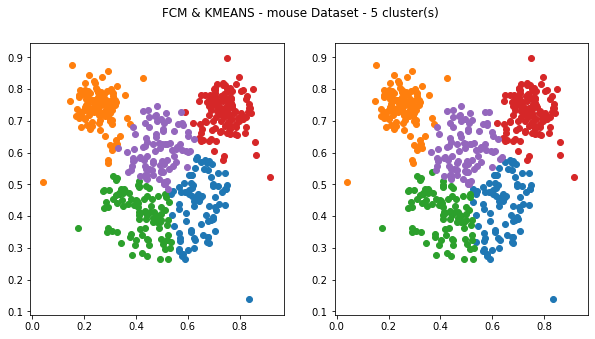

,X,Y,ADJUSTED_FCM,KMEANS
0,0.456601,0.432806,2,2
1,0.611378,0.528625,0,0
2,0.450299,0.711606,4,4
3,0.639015,0.460744,0,0
4,0.628957,0.323470,0,0
...,...,...,...,...
495,0.151506,0.876586,1,1
496,0.860308,0.633833,3,3
497,0.862083,0.591805,3,3
498,0.916030,0.523391,3,3


,ADJUSTED_FCM,KMEANS
count,500.000000,500.000000
mean,2.040000,2.032000
std,1.363127,1.366276
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,4.000000,4.000000


The predicted values are 98.4% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.640002,0.429857,0.639176,0.434885,0.005095
1,0.253380,0.739848,0.249019,0.748047,0.009287
2,0.409192,0.408640,0.420097,0.411988,0.011407
3,0.744696,0.726792,0.744531,0.733355,0.006565
4,0.493000,0.611256,0.484740,0.601198,0.013015


--------------------------------------------------------------
Raw Comparisons: 




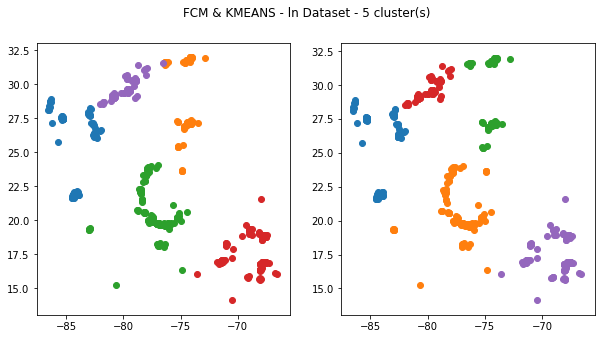

,X,Y,FCM,KMEANS
122796,-79.5609,29.5326,4,3
122797,-71.0343,18.1271,3,4
122798,-85.4239,27.5546,0,0
122799,-85.3559,27.5989,0,0
122800,-76.2114,19.6181,2,1
...,...,...,...,...
123482,-78.1610,20.5861,2,1
123483,-84.5211,21.7879,0,0
123484,-84.3567,21.7220,0,0
123485,-79.8456,30.6004,4,3


The predicted values are 21.562952243125906% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,-84.074650,25.574470,-83.941442,26.099955,0.542105
1,-77.055755,20.235927,-74.635789,27.694905,7.841721
2,-74.567831,29.021143,-76.816361,19.808127,9.483435
3,-80.114867,29.495557,-68.867184,17.531924,16.420685
4,-69.081470,17.509929,-80.100737,29.360976,16.182446


Adjusted Comparisons: 


Center mappings:  [[0, 0], [1, 2], [2, 1], [3, 4], [4, 3]]


,index,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,122796,-79.5609,29.5326,4,3,3
1,122797,-71.0343,18.1271,3,4,4
2,122798,-85.4239,27.5546,0,0,0
3,122799,-85.3559,27.5989,0,0,0
4,122800,-76.2114,19.6181,2,1,1
...,...,...,...,...,...,...
686,123482,-78.1610,20.5861,2,1,1
687,123483,-84.5211,21.7879,0,0,0
688,123484,-84.3567,21.7220,0,0,0
689,123485,-79.8456,30.6004,4,3,3


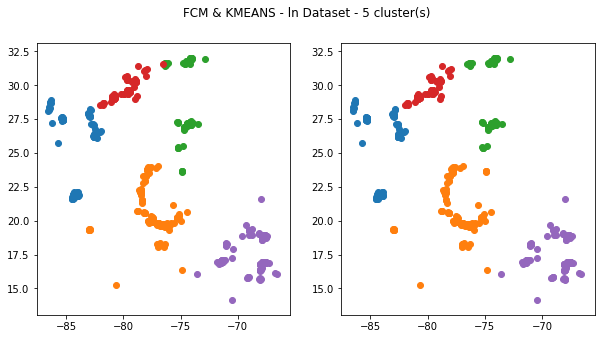

,X,Y,ADJUSTED_FCM,KMEANS
0,-79.5609,29.5326,3,3
1,-71.0343,18.1271,4,4
2,-85.4239,27.5546,0,0
3,-85.3559,27.5989,0,0
4,-76.2114,19.6181,1,1
...,...,...,...,...
686,-78.1610,20.5861,1,1
687,-84.5211,21.7879,0,0
688,-84.3567,21.7220,0,0
689,-79.8456,30.6004,3,3


,ADJUSTED_FCM,KMEANS
count,691.000000,691.000000
mean,1.788712,1.781476
std,1.411727,1.412164
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,3.000000,3.000000
max,4.000000,4.000000


The predicted values are 99.27641099855282% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,-84.074650,25.574470,-83.941442,26.099955,0.542105
1,-77.055755,20.235927,-76.816361,19.808127,0.490227
2,-74.567831,29.021143,-74.635789,27.694905,1.327978
3,-80.114867,29.495557,-80.100737,29.360976,0.135321
4,-69.081470,17.509929,-68.867184,17.531924,0.215412


--------------------------------------------------------------
Raw Comparisons: 




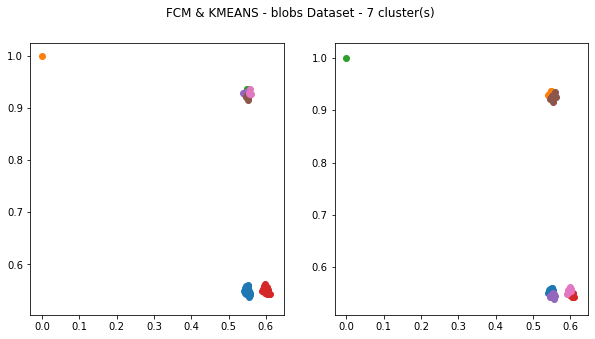

,X,Y,FCM,KMEANS
0,0.000000,1.000000,1,2
1,0.605470,0.547282,3,3
2,0.590862,0.549582,3,6
3,0.548940,0.551625,0,0
4,0.603320,0.550609,3,3
...,...,...,...,...
96,0.598390,0.562372,3,6
97,0.554804,0.545750,0,4
98,0.593299,0.552969,3,6
99,0.544953,0.544810,0,4


The predicted values are 55.44554455445545% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.548898,0.553960,5.506130e-01,0.550154,0.004175
1,0.545728,0.930109,4.323232e-07,1.000000,0.550185
2,0.000000,1.000000,5.481234e-01,0.928013,0.552830
3,0.603093,0.548420,6.012774e-01,0.550834,0.003021
4,0.552796,0.545326,5.423827e-01,0.929482,0.384297
5,0.552924,0.924298,5.514812e-01,0.922982,0.001953
6,0.597893,0.555332,5.577609e-01,0.927326,0.374153


Adjusted Comparisons: 


Center mappings:  [[0, 0], [1, 2], [2, 1], [3, 3], [4, 1], [5, 5], [6, 5]]


,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,0.000000,1.000000,1,2,2
1,0.605470,0.547282,3,3,3
2,0.590862,0.549582,3,6,3
3,0.548940,0.551625,0,0,0
4,0.603320,0.550609,3,3,3
...,...,...,...,...,...
96,0.598390,0.562372,3,6,3
97,0.554804,0.545750,0,4,0
98,0.593299,0.552969,3,6,3
99,0.544953,0.544810,0,4,0


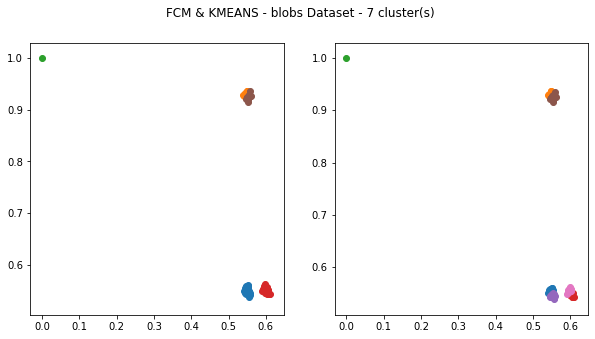

,X,Y,ADJUSTED_FCM,KMEANS
0,0.000000,1.000000,2,2
1,0.605470,0.547282,3,3
2,0.590862,0.549582,3,6
3,0.548940,0.551625,0,0
4,0.603320,0.550609,3,3
...,...,...,...,...
96,0.598390,0.562372,3,6
97,0.554804,0.545750,0,4
98,0.593299,0.552969,3,6
99,0.544953,0.544810,0,4


,ADJUSTED_FCM,KMEANS
count,101.000000,101.000000
mean,2.079208,3.118812
std,1.952860,2.070204
min,0.000000,0.000000
25%,0.000000,1.000000
50%,3.000000,3.000000
75%,3.000000,5.000000
max,5.000000,6.000000


The predicted values are 71.28712871287128% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.548898,0.553960,5.506130e-01,0.550154,4.175032e-03
1,0.545728,0.930109,5.423827e-01,0.929482,3.403850e-03
2,0.000000,1.000000,4.323232e-07,1.000000,5.404959e-07
3,0.603093,0.548420,6.012774e-01,0.550834,3.021026e-03
4,0.552796,0.545326,NaN,NaN,NaN
5,0.552924,0.924298,5.577609e-01,0.927326,5.705943e-03
6,0.597893,0.555332,NaN,NaN,NaN


--------------------------------------------------------------
Raw Comparisons: 




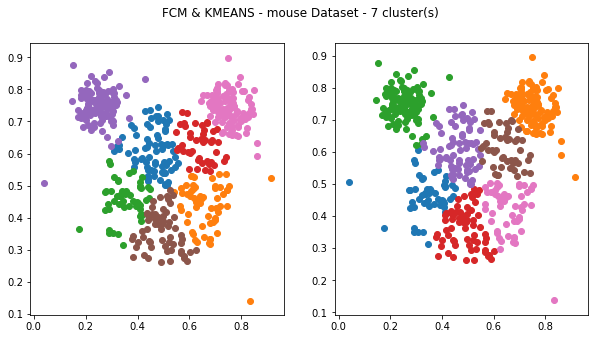

,X,Y,FCM,KMEANS
0,0.456601,0.432806,5,3
1,0.611378,0.528625,1,5
2,0.450299,0.711606,0,4
3,0.639015,0.460744,1,6
4,0.628957,0.323470,1,6
...,...,...,...,...
495,0.151506,0.876586,4,2
496,0.860308,0.633833,6,1
497,0.862083,0.591805,6,1
498,0.916030,0.523391,1,1


The predicted values are 0.4% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.343316,0.464711,0.459986,0.601536,0.179814
1,0.755588,0.739051,0.654530,0.443038,0.312787
2,0.251582,0.749040,0.359441,0.462909,0.305785
3,0.487839,0.363969,0.638793,0.635619,0.310775
4,0.464349,0.608680,0.245719,0.751880,0.261352
5,0.639456,0.614740,0.497979,0.360922,0.290584
6,0.657393,0.421526,0.753757,0.744512,0.337055


Adjusted Comparisons: 


Center mappings:  [[0, 4], [1, 6], [2, 0], [3, 5], [4, 2], [5, 3], [6, 1]]


,X,Y,Loc,FCM,KMEANS,ADJUSTED_FCM
0,0.456601,0.432806,Head,5,3,3
1,0.611378,0.528625,Head,1,5,6
2,0.450299,0.711606,Head,0,4,4
3,0.639015,0.460744,Head,1,6,6
4,0.628957,0.323470,Head,1,6,6
...,...,...,...,...,...,...
495,0.151506,0.876586,Noise,4,2,2
496,0.860308,0.633833,Noise,6,1,1
497,0.862083,0.591805,Noise,6,1,1
498,0.916030,0.523391,Noise,1,1,6


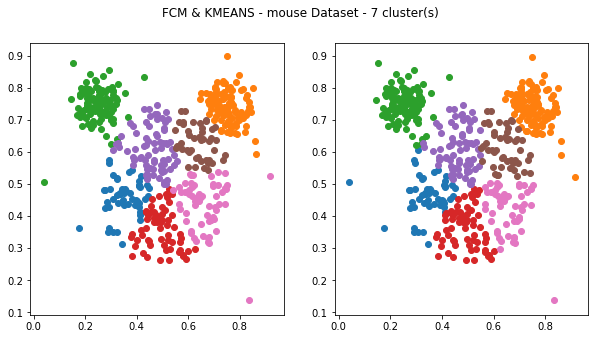

,X,Y,ADJUSTED_FCM,KMEANS
0,0.456601,0.432806,3,3
1,0.611378,0.528625,6,5
2,0.450299,0.711606,4,4
3,0.639015,0.460744,6,6
4,0.628957,0.323470,6,6
...,...,...,...,...
495,0.151506,0.876586,2,2
496,0.860308,0.633833,1,1
497,0.862083,0.591805,1,1
498,0.916030,0.523391,6,1


,ADJUSTED_FCM,KMEANS
count,500.000000,500.000000
mean,2.772000,2.740000
std,1.870565,1.841516
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,6.000000,6.000000


The predicted values are 96.2% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.343316,0.464711,0.359441,0.462909,0.016226
1,0.755588,0.739051,0.753757,0.744512,0.005761
2,0.251582,0.749040,0.245719,0.751880,0.006515
3,0.487839,0.363969,0.497979,0.360922,0.010588
4,0.464349,0.608680,0.459986,0.601536,0.008371
5,0.639456,0.614740,0.638793,0.635619,0.020890
6,0.657393,0.421526,0.654530,0.443038,0.021702


--------------------------------------------------------------
Raw Comparisons: 




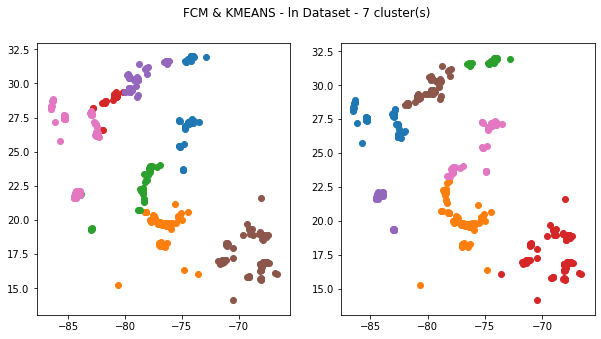

,X,Y,FCM,KMEANS
122796,-79.5609,29.5326,4,5
122797,-71.0343,18.1271,5,3
122798,-85.4239,27.5546,6,0
122799,-85.3559,27.5989,6,0
122800,-76.2114,19.6181,1,1
...,...,...,...,...
123482,-78.1610,20.5861,1,1
123483,-84.5211,21.7879,6,4
123484,-84.3567,21.7220,6,4
123485,-79.8456,30.6004,4,5


The predicted values are 25.03617945007236% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,-83.994334,27.140402,-74.442760,27.375876,9.554477
1,-76.832420,19.794862,-76.604484,19.589274,0.306955
2,-74.747879,31.811600,-78.771459,22.546400,10.101145
3,-69.081470,17.509929,-80.967097,28.808473,16.398940
4,-84.105822,21.552373,-79.163401,29.885545,9.688616
5,-80.114867,29.495557,-68.723410,17.514157,16.532369
6,-75.516396,25.734733,-84.867020,27.020257,9.438577


Adjusted Comparisons: 


Center mappings:  [[0, 6], [1, 1], [2, 1], [3, 5], [4, 5], [5, 3], [6, 0]]


,index,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,122796,-79.5609,29.5326,4,5,5
1,122797,-71.0343,18.1271,5,3,3
2,122798,-85.4239,27.5546,6,0,0
3,122799,-85.3559,27.5989,6,0,0
4,122800,-76.2114,19.6181,1,1,1
...,...,...,...,...,...,...
686,123482,-78.1610,20.5861,1,1,1
687,123483,-84.5211,21.7879,6,4,0
688,123484,-84.3567,21.7220,6,4,0
689,123485,-79.8456,30.6004,4,5,5


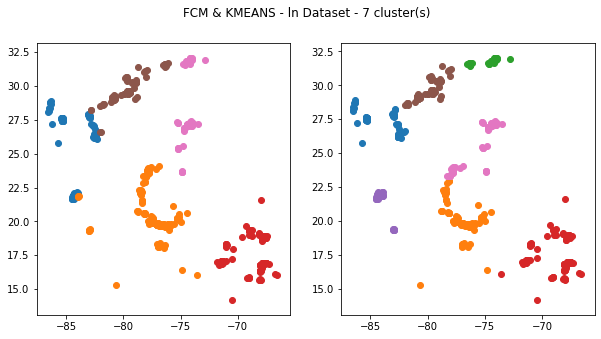

,X,Y,ADJUSTED_FCM,KMEANS
0,-79.5609,29.5326,5,5
1,-71.0343,18.1271,3,3
2,-85.4239,27.5546,0,0
3,-85.3559,27.5989,0,0
4,-76.2114,19.6181,1,1
...,...,...,...,...
686,-78.1610,20.5861,1,1
687,-84.5211,21.7879,0,4
688,-84.3567,21.7220,0,4
689,-79.8456,30.6004,5,5


,ADJUSTED_FCM,KMEANS
count,691.000000,691.000000
mean,2.458755,2.684515
std,2.131739,2.024926
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,3.000000
75%,5.000000,5.000000
max,6.000000,6.000000


The predicted values are 84.22575976845152% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,-83.994334,27.140402,-84.867020,27.020257,0.880917
1,-76.832420,19.794862,-78.771459,22.546400,3.366130
2,-74.747879,31.811600,NaN,NaN,NaN
3,-69.081470,17.509929,-68.723410,17.514157,0.358085
4,-84.105822,21.552373,NaN,NaN,NaN
5,-80.114867,29.495557,-79.163401,29.885545,1.028289
6,-75.516396,25.734733,-74.442760,27.375876,1.961133


--------------------------------------------------------------
Raw Comparisons: 




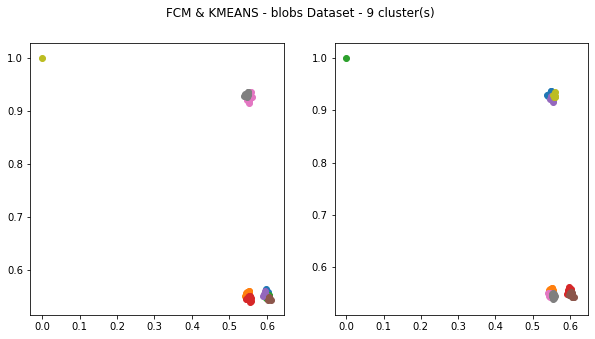

,X,Y,FCM,KMEANS
0,0.000000,1.000000,8,2
1,0.605470,0.547282,5,5
2,0.590862,0.549582,4,3
3,0.548940,0.551625,1,1
4,0.603320,0.550609,2,5
...,...,...,...,...
96,0.598390,0.562372,0,3
97,0.554804,0.545750,3,7
98,0.593299,0.552969,4,3
99,0.544953,0.544810,3,6


The predicted values are 22.772277227722775% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.545728,0.930109,6.009891e-01,0.555426,0.378736
1,0.549673,0.554533,5.490803e-01,0.553797,0.000945
2,0.000000,1.000000,6.017630e-01,0.549628,0.751634
3,0.597990,0.554932,5.529062e-01,0.545541,0.046051
4,0.551132,0.922741,5.940559e-01,0.553864,0.371366
5,0.603306,0.548308,6.066393e-01,0.544643,0.004954
6,0.545484,0.547838,5.527261e-01,0.924077,0.376308
7,0.554099,0.545364,5.468774e-01,0.929164,0.383867
8,0.557703,0.928451,1.735653e-07,1.000000,0.562274


Adjusted Comparisons: 


Center mappings:  [[0, 3], [1, 1], [2, 5], [3, 7], [4, 3], [5, 5], [6, 4], [7, 0], [8, 2]]


,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,0.000000,1.000000,8,2,2
1,0.605470,0.547282,5,5,5
2,0.590862,0.549582,4,3,3
3,0.548940,0.551625,1,1,1
4,0.603320,0.550609,2,5,5
...,...,...,...,...,...
96,0.598390,0.562372,0,3,3
97,0.554804,0.545750,3,7,7
98,0.593299,0.552969,4,3,3
99,0.544953,0.544810,3,6,7


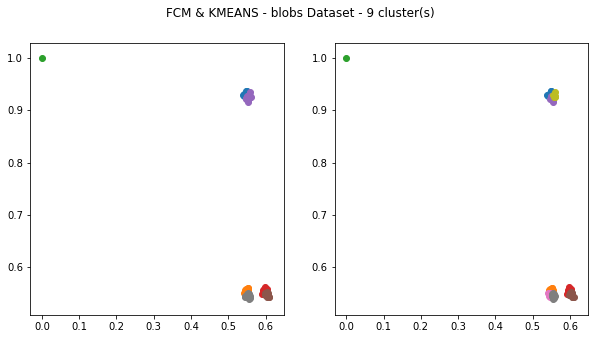

,X,Y,ADJUSTED_FCM,KMEANS
0,0.000000,1.000000,2,2
1,0.605470,0.547282,5,5
2,0.590862,0.549582,3,3
3,0.548940,0.551625,1,1
4,0.603320,0.550609,5,5
...,...,...,...,...
96,0.598390,0.562372,3,3
97,0.554804,0.545750,7,7
98,0.593299,0.552969,3,3
99,0.544953,0.544810,7,6


,ADJUSTED_FCM,KMEANS
count,101.000000,101.000000
mean,3.594059,3.930693
std,2.245788,2.421807
min,0.000000,0.000000
25%,1.000000,1.000000
50%,4.000000,4.000000
75%,5.000000,6.000000
max,7.000000,8.000000


The predicted values are 87.12871287128714% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.545728,0.930109,5.468774e-01,0.929164,1.488203e-03
1,0.549673,0.554533,5.490803e-01,0.553797,9.447620e-04
2,0.000000,1.000000,1.735653e-07,1.000000,1.798823e-07
3,0.597990,0.554932,5.940559e-01,0.553864,4.076228e-03
4,0.551132,0.922741,5.527261e-01,0.924077,2.079589e-03
5,0.603306,0.548308,6.066393e-01,0.544643,4.954199e-03
6,0.545484,0.547838,NaN,NaN,NaN
7,0.554099,0.545364,5.529062e-01,0.545541,1.205523e-03
8,0.557703,0.928451,NaN,NaN,NaN


--------------------------------------------------------------
Raw Comparisons: 




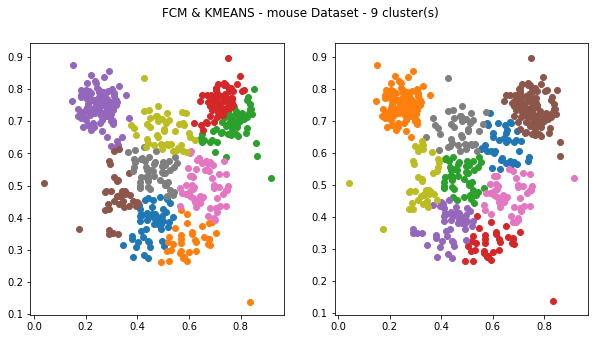

,X,Y,FCM,KMEANS
0,0.456601,0.432806,0,4
1,0.611378,0.528625,6,6
2,0.450299,0.711606,8,7
3,0.639015,0.460744,6,6
4,0.628957,0.323470,1,3
...,...,...,...,...
495,0.151506,0.876586,4,1
496,0.860308,0.633833,2,5
497,0.862083,0.591805,2,5
498,0.916030,0.523391,2,6


The predicted values are 9.2% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.639983,0.627732,0.454273,0.388811,0.302607
1,0.246027,0.753091,0.599381,0.331600,0.550012
2,0.478463,0.524913,0.771338,0.699456,0.340941
3,0.596325,0.316136,0.724937,0.764378,0.466328
4,0.429462,0.378380,0.243608,0.752813,0.418021
5,0.753984,0.741207,0.335605,0.470948,0.498077
6,0.664913,0.469229,0.653143,0.488891,0.022916
7,0.469107,0.673603,0.462578,0.549288,0.124487
8,0.321424,0.513095,0.492763,0.669358,0.231894


Adjusted Comparisons: 


Center mappings:  [[0, 4], [1, 3], [2, 5], [3, 5], [4, 1], [5, 8], [6, 6], [7, 2], [8, 7]]


,X,Y,Loc,FCM,KMEANS,ADJUSTED_FCM
0,0.456601,0.432806,Head,0,4,4
1,0.611378,0.528625,Head,6,6,6
2,0.450299,0.711606,Head,8,7,7
3,0.639015,0.460744,Head,6,6,6
4,0.628957,0.323470,Head,1,3,3
...,...,...,...,...,...,...
495,0.151506,0.876586,Noise,4,1,1
496,0.860308,0.633833,Noise,2,5,5
497,0.862083,0.591805,Noise,2,5,5
498,0.916030,0.523391,Noise,2,6,5


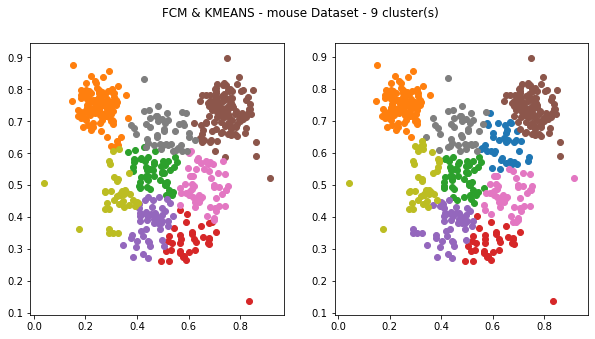

,X,Y,ADJUSTED_FCM,KMEANS
0,0.456601,0.432806,4,4
1,0.611378,0.528625,6,6
2,0.450299,0.711606,7,7
3,0.639015,0.460744,6,6
4,0.628957,0.323470,3,3
...,...,...,...,...
495,0.151506,0.876586,1,1
496,0.860308,0.633833,5,5
497,0.862083,0.591805,5,5
498,0.916030,0.523391,5,6


,ADJUSTED_FCM,KMEANS
count,500.000000,500.000000
mean,4.110000,3.774000
std,2.269847,2.460698
min,1.000000,0.000000
25%,2.000000,1.000000
50%,5.000000,4.000000
75%,6.000000,6.000000
max,8.000000,8.000000


The predicted values are 85.2% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.639983,0.627732,NaN,NaN,NaN
1,0.246027,0.753091,0.243608,0.752813,0.002435
2,0.478463,0.524913,0.462578,0.549288,0.029095
3,0.596325,0.316136,0.599381,0.331600,0.015763
4,0.429462,0.378380,0.454273,0.388811,0.026915
5,0.753984,0.741207,0.724937,0.764378,0.037156
6,0.664913,0.469229,0.653143,0.488891,0.022916
7,0.469107,0.673603,0.492763,0.669358,0.024034
8,0.321424,0.513095,0.335605,0.470948,0.044468


--------------------------------------------------------------
Raw Comparisons: 




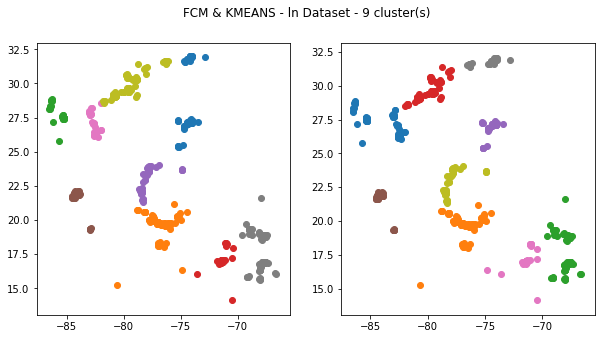

,X,Y,FCM,KMEANS
122796,-79.5609,29.5326,8,3
122797,-71.0343,18.1271,3,6
122798,-85.4239,27.5546,2,0
122799,-85.3559,27.5989,2,0
122800,-76.2114,19.6181,1,1
...,...,...,...,...
123482,-78.1610,20.5861,1,1
123483,-84.5211,21.7879,5,5
123484,-84.3567,21.7220,5,5
123485,-79.8456,30.6004,8,3


The predicted values are 32.41678726483357% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,-83.994334,27.140402,-74.391725,27.643525,9.615781
1,-76.691261,19.589319,-76.604070,19.614749,0.090824
2,-68.045743,17.652374,-85.419631,27.631629,20.035906
3,-80.114867,29.495557,-71.177211,17.300756,15.119354
4,-74.432795,26.928300,-77.910524,23.198694,5.099466
5,-84.105822,21.552373,-84.181292,21.764553,0.225201
6,-71.407164,17.181438,-82.440471,26.581911,14.494921
7,-74.747879,31.811600,-67.920262,17.500117,15.856698
8,-77.765979,23.081030,-79.949949,29.541718,6.819840


Adjusted Comparisons: 


Center mappings:  [[0, 4], [1, 1], [2, 0], [3, 6], [4, 8], [5, 5], [6, 0], [7, 2], [8, 3]]


,index,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,122796,-79.5609,29.5326,8,3,3
1,122797,-71.0343,18.1271,3,6,6
2,122798,-85.4239,27.5546,2,0,0
3,122799,-85.3559,27.5989,2,0,0
4,122800,-76.2114,19.6181,1,1,1
...,...,...,...,...,...,...
686,123482,-78.1610,20.5861,1,1,1
687,123483,-84.5211,21.7879,5,5,5
688,123484,-84.3567,21.7220,5,5,5
689,123485,-79.8456,30.6004,8,3,3


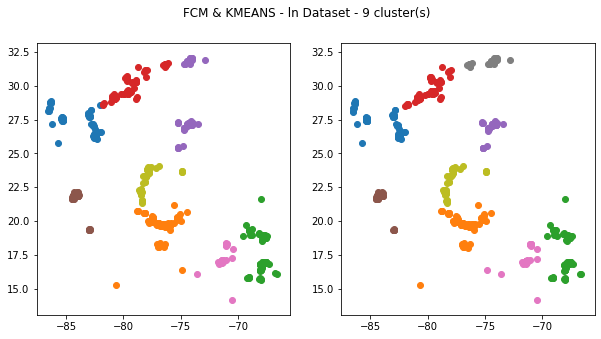

,X,Y,ADJUSTED_FCM,KMEANS
0,-79.5609,29.5326,3,3
1,-71.0343,18.1271,6,6
2,-85.4239,27.5546,0,0
3,-85.3559,27.5989,0,0
4,-76.2114,19.6181,1,1
...,...,...,...,...
686,-78.1610,20.5861,1,1
687,-84.5211,21.7879,5,5
688,-84.3567,21.7220,5,5
689,-79.8456,30.6004,3,3


,ADJUSTED_FCM,KMEANS
count,691.000000,691.000000
mean,2.641100,2.808973
std,2.188571,2.367897
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,4.000000,4.000000
max,8.000000,8.000000


The predicted values are 94.93487698986975% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,-83.994334,27.140402,-82.440471,26.581911,1.651183
1,-76.691261,19.589319,-76.604070,19.614749,0.090824
2,-68.045743,17.652374,-67.920262,17.500117,0.197301
3,-80.114867,29.495557,-79.949949,29.541718,0.171256
4,-74.432795,26.928300,-74.391725,27.643525,0.716403
5,-84.105822,21.552373,-84.181292,21.764553,0.225201
6,-71.407164,17.181438,-71.177211,17.300756,0.259066
7,-74.747879,31.811600,NaN,NaN,NaN
8,-77.765979,23.081030,-77.910524,23.198694,0.186381


--------------------------------------------------------------
Raw Comparisons: 




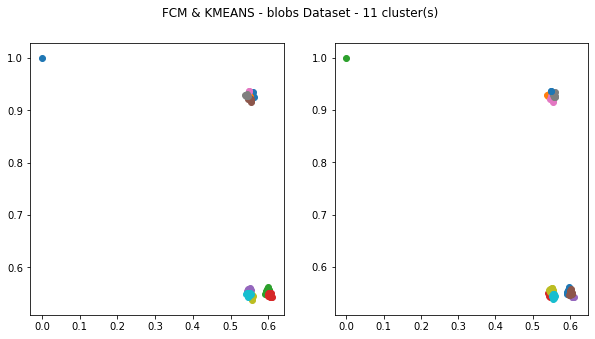

,X,Y,FCM,KMEANS
0,0.000000,1.000000,10,2
1,0.605470,0.547282,3,4
2,0.590862,0.549582,2,0
3,0.548940,0.551625,9,3
4,0.603320,0.550609,3,5
...,...,...,...,...
96,0.598390,0.562372,2,0
97,0.554804,0.545750,8,9
98,0.593299,0.552969,2,0
99,0.544953,0.544810,9,3


The predicted values are 2.9702970297029703% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.595845,0.555611,5.582171e-01,0.926865,0.373156
1,0.544822,0.928351,5.506370e-01,0.924868,0.006778
2,0.000000,1.000000,5.984810e-01,0.554831,0.745892
3,0.548210,0.548693,6.031297e-01,0.548563,0.054920
4,0.606557,0.544785,5.496453e-01,0.554837,0.057793
5,0.601841,0.550729,5.520287e-01,0.921596,0.374198
6,0.551132,0.922741,5.493246e-01,0.935875,0.013257
7,0.557703,0.928451,5.425407e-01,0.928503,0.015162
8,0.549598,0.555321,5.543853e-01,0.544497,0.011836
9,0.554719,0.544508,5.490204e-01,0.549279,0.007432


Adjusted Comparisons: 


Center mappings:  [[0, 7], [1, 6], [2, 0], [3, 5], [4, 8], [5, 6], [6, 10], [7, 1], [8, 9], [9, 3], [10, 2]]


,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,0.000000,1.000000,10,2,2
1,0.605470,0.547282,3,4,5
2,0.590862,0.549582,2,0,0
3,0.548940,0.551625,9,3,3
4,0.603320,0.550609,3,5,5
...,...,...,...,...,...
96,0.598390,0.562372,2,0,0
97,0.554804,0.545750,8,9,9
98,0.593299,0.552969,2,0,0
99,0.544953,0.544810,9,3,3


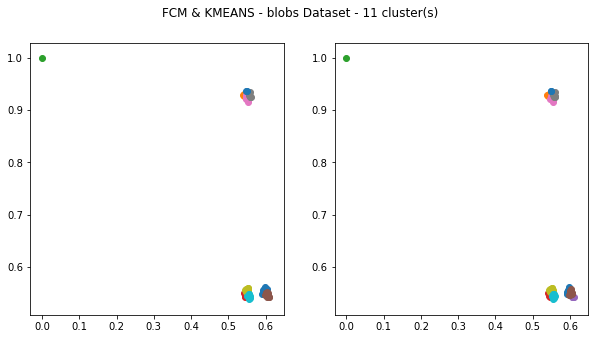

,X,Y,ADJUSTED_FCM,KMEANS
0,0.000000,1.000000,2,2
1,0.605470,0.547282,5,4
2,0.590862,0.549582,0,0
3,0.548940,0.551625,3,3
4,0.603320,0.550609,5,5
...,...,...,...,...
96,0.598390,0.562372,0,0
97,0.554804,0.545750,9,9
98,0.593299,0.552969,0,0
99,0.544953,0.544810,3,3


,ADJUSTED_FCM,KMEANS
count,101.000000,101.000000
mean,5.267327,5.316832
std,2.859689,2.720039
min,0.000000,0.000000
25%,3.000000,3.000000
50%,6.000000,5.000000
75%,8.000000,8.000000
max,10.000000,10.000000


The predicted values are 87.12871287128714% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.595845,0.555611,5.984810e-01,0.554831,2.748582e-03
1,0.544822,0.928351,5.425407e-01,0.928503,2.286454e-03
2,0.000000,1.000000,4.786168e-08,1.000000,5.657089e-08
3,0.548210,0.548693,5.490204e-01,0.549279,1.000120e-03
4,0.606557,0.544785,NaN,NaN,NaN
5,0.601841,0.550729,6.031297e-01,0.548563,2.520384e-03
6,0.551132,0.922741,5.520287e-01,0.921596,1.454103e-03
7,0.557703,0.928451,5.582171e-01,0.926865,1.667048e-03
8,0.549598,0.555321,5.496453e-01,0.554837,4.868921e-04
9,0.554719,0.544508,5.543853e-01,0.544497,3.338715e-04


--------------------------------------------------------------
Raw Comparisons: 




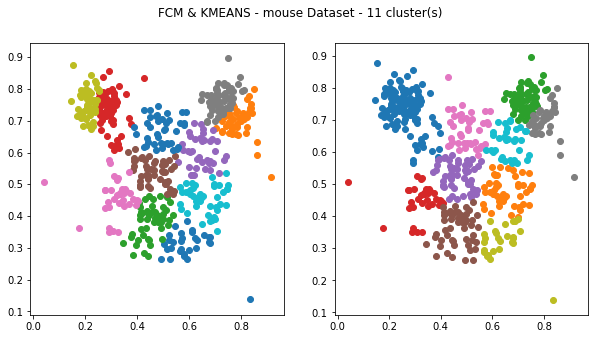

,X,Y,FCM,KMEANS
0,0.456601,0.432806,2,5
1,0.611378,0.528625,4,1
2,0.450299,0.711606,10,6
3,0.639015,0.460744,9,1
4,0.628957,0.323470,0,8
...,...,...,...,...
495,0.151506,0.876586,8,10
496,0.860308,0.633833,1,7
497,0.862083,0.591805,1,7
498,0.916030,0.523391,1,7


The predicted values are 0.2% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,0.330040,0.644479,0.576668,0.320247,0.407371
1,0.653709,0.477344,0.782807,0.707688,0.264055
2,0.730149,0.765607,0.450950,0.391042,0.467173
3,0.319897,0.449816,0.282123,0.745669,0.298255
4,0.464533,0.527708,0.645875,0.605398,0.197284
5,0.463052,0.362232,0.462328,0.541071,0.178840
6,0.499604,0.670692,0.335463,0.466294,0.262146
7,0.804436,0.697222,0.725951,0.767383,0.105274
8,0.635198,0.323293,0.214350,0.752746,0.601284
9,0.661295,0.630068,0.655614,0.453470,0.176689


Adjusted Comparisons: 


Center mappings:  [[0, 8], [1, 7], [2, 5], [3, 10], [4, 9], [5, 4], [6, 3], [7, 2], [8, 10], [9, 1], [10, 6]]


,X,Y,Loc,FCM,KMEANS,ADJUSTED_FCM
0,0.456601,0.432806,Head,2,5,5
1,0.611378,0.528625,Head,4,1,9
2,0.450299,0.711606,Head,10,6,6
3,0.639015,0.460744,Head,9,1,1
4,0.628957,0.323470,Head,0,8,8
...,...,...,...,...,...,...
495,0.151506,0.876586,Noise,8,10,10
496,0.860308,0.633833,Noise,1,7,7
497,0.862083,0.591805,Noise,1,7,7
498,0.916030,0.523391,Noise,1,7,7


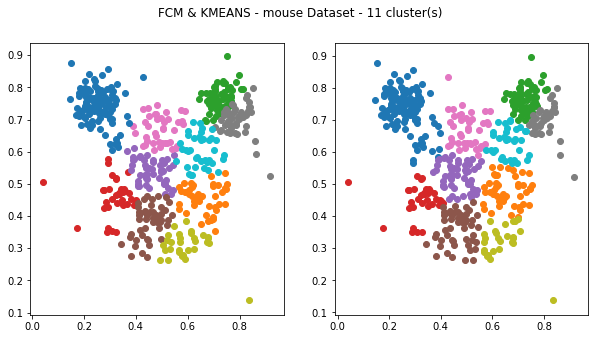

,X,Y,ADJUSTED_FCM,KMEANS
0,0.456601,0.432806,5,5
1,0.611378,0.528625,9,1
2,0.450299,0.711606,6,6
3,0.639015,0.460744,1,1
4,0.628957,0.323470,8,8
...,...,...,...,...
495,0.151506,0.876586,10,10
496,0.860308,0.633833,7,7
497,0.862083,0.591805,7,7
498,0.916030,0.523391,7,7


,ADJUSTED_FCM,KMEANS
count,500.000000,500.000000
mean,5.932000,5.388000
std,3.126488,3.266619
min,1.000000,0.000000
25%,3.000000,2.000000
50%,6.000000,5.000000
75%,9.000000,9.000000
max,10.000000,10.000000


The predicted values are 86.4% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,0.330040,0.644479,NaN,NaN,NaN
1,0.653709,0.477344,0.655614,0.453470,0.023949
2,0.730149,0.765607,0.725951,0.767383,0.004559
3,0.319897,0.449816,0.335463,0.466294,0.022668
4,0.464533,0.527708,0.462328,0.541071,0.013544
5,0.463052,0.362232,0.450950,0.391042,0.031248
6,0.499604,0.670692,0.484790,0.666906,0.015290
7,0.804436,0.697222,0.782807,0.707688,0.024029
8,0.635198,0.323293,0.576668,0.320247,0.058609
9,0.661295,0.630068,0.645875,0.605398,0.029093


--------------------------------------------------------------
Raw Comparisons: 




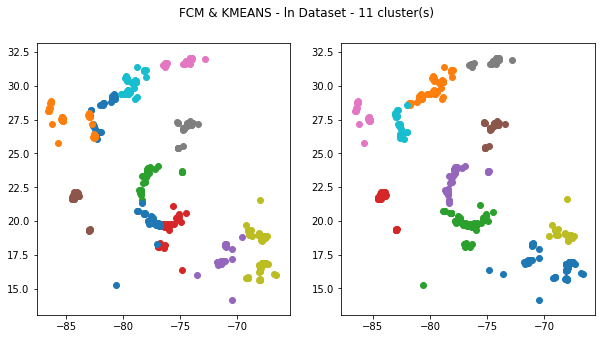

,X,Y,FCM,KMEANS
122796,-79.5609,29.5326,9,1
122797,-71.0343,18.1271,4,10
122798,-85.4239,27.5546,1,6
122799,-85.3559,27.5989,1,6
122800,-76.2114,19.6181,3,2
...,...,...,...,...
123482,-78.1610,20.5861,10,2
123483,-84.5211,21.7879,5,3
123484,-84.3567,21.7220,5,3
123485,-79.8456,30.6004,9,1


The predicted values are 5.209840810419681% similar.
Centers:


,KMEANS_X,KMEANS_Y,FCM_X,FCM_Y,distance
0,-67.938516,16.497260,-80.967714,28.924077,18.005160
1,-80.099485,29.503299,-85.210189,27.532290,5.477607
2,-76.691261,19.589319,-77.982241,23.354797,3.980634
3,-84.105822,21.552373,-76.253898,19.611861,8.088158
4,-77.765979,23.081030,-71.161827,17.278589,8.791083
5,-74.432795,26.928300,-84.194569,21.825453,11.015048
6,-85.541194,27.644680,-74.444901,31.845130,11.864716
7,-74.747879,31.811600,-74.385224,27.029613,4.795719
8,-68.176154,19.057243,-67.902715,17.439195,1.640990
9,-82.553898,26.708796,-79.488904,29.742890,4.312761


Adjusted Comparisons: 


Center mappings:  [[0, 1], [1, 6], [2, 4], [3, 2], [4, 10], [5, 3], [6, 7], [7, 5], [8, 0], [9, 1], [10, 2]]


,index,X,Y,FCM,KMEANS,ADJUSTED_FCM
0,122796,-79.5609,29.5326,9,1,1
1,122797,-71.0343,18.1271,4,10,10
2,122798,-85.4239,27.5546,1,6,6
3,122799,-85.3559,27.5989,1,6,6
4,122800,-76.2114,19.6181,3,2,2
...,...,...,...,...,...,...
686,123482,-78.1610,20.5861,10,2,2
687,123483,-84.5211,21.7879,5,3,3
688,123484,-84.3567,21.7220,5,3,3
689,123485,-79.8456,30.6004,9,1,1


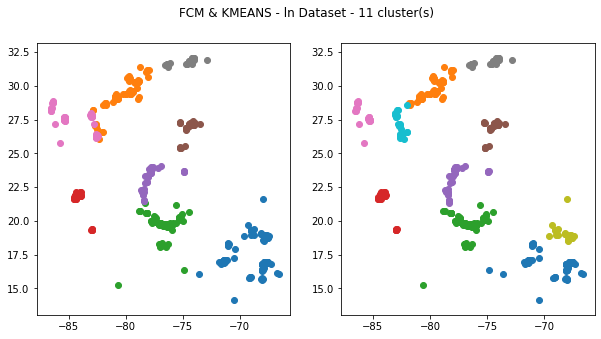

,X,Y,ADJUSTED_FCM,KMEANS
0,-79.5609,29.5326,1,1
1,-71.0343,18.1271,10,10
2,-85.4239,27.5546,6,6
3,-85.3559,27.5989,6,6
4,-76.2114,19.6181,2,2
...,...,...,...,...
686,-78.1610,20.5861,2,2
687,-84.5211,21.7879,3,3
688,-84.3567,21.7220,3,3
689,-79.8456,30.6004,1,1


,ADJUSTED_FCM,KMEANS
count,691.000000,691.000000
mean,3.062229,3.920405
std,2.649672,3.058517
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,5.000000,6.000000
max,10.000000,10.000000


The predicted values are 86.5412445730825% similar.
Adjusted Centers:


,KMEANS_X,KMEANS_Y,ADJUSTED_FCM_X,ADJUSTED_FCM_Y,distance
0,-67.938516,16.497260,-67.902715,17.439195,0.942615
1,-80.099485,29.503299,-79.488904,29.742890,0.655905
2,-76.691261,19.589319,-77.223925,19.806187,0.575119
3,-84.105822,21.552373,-84.194569,21.825453,0.287138
4,-77.765979,23.081030,-77.982241,23.354797,0.348880
5,-74.432795,26.928300,-74.385224,27.029613,0.111925
6,-85.541194,27.644680,-85.210189,27.532290,0.349565
7,-74.747879,31.811600,-74.444901,31.845130,0.304827
8,-68.176154,19.057243,NaN,NaN,NaN
9,-82.553898,26.708796,NaN,NaN,NaN


--------------------------------------------------------------
Wall time: 25min 16s


In [5]:
%%time
similarities = {'mouse':[],'blobs':[],'ln':[]}
adjusted_similarities = {'mouse':[],'blobs':[],'ln':[]}
for i in range(3,12,2):
    for name, df in dfs.items():
        temp = df.copy()
        '''
        fcm = FCM.FCM(temp[['X','Y']], c=i)
        fcm_centers = fcm.fit()
        temp['FCM'] = fcm.classify()
        '''
        db = DBSCAN(eps=1.5. min_samples = i)
        db.fit(temp[['X','Y']])
        db.

        KM = KMeans(i, max_iter=max_iter, tol=tol)
        KM.fit(temp[['X','Y']])
        temp['KMEANS'] = KM.predict(temp[['X','Y']])
        kmeans_centers = KM.cluster_centers_
        
        print("Raw Comparisons: \n\n")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        fig.suptitle('FCM & KMEANS - %s Dataset - %d cluster(s)' % (name,i))
        for x in range(i):
            ax1.scatter(temp[temp['FCM'] == x]['X'], 
                        temp[temp['FCM'] == x]['Y'])
            ax2.scatter(temp[temp['KMEANS'] == x]['X'], 
                        temp[temp['KMEANS'] == x]['Y'])
        plt.show()
        display(temp[['X','Y','FCM','KMEANS']])
        similarity = similarity_metric(temp[['FCM']].values, 
                                       temp[['KMEANS']].values)
        print("The predicted values are %s%% similar." % similarity)
        similarities[name].append([i, similarity])

        print("Centers:")
        fcm_centers.columns = ['FCM_X', 'FCM_Y']
        kmeans_centers = pd.DataFrame(data=kmeans_centers, 
                                      columns=['KMEANS_X','KMEANS_Y'])
        centers = kmeans_centers.copy().join(fcm_centers)
        centers['distance'] = np.sqrt(abs(centers['FCM_X']-centers['KMEANS_X'])**2 + 
                                      abs(centers['FCM_Y']-centers['KMEANS_Y'])**2)
        display(centers)

        print("Adjusted Comparisons: \n\n")
        fcm_centers_ls = fcm_centers.values.tolist()
        kmeans_centers_ls = kmeans_centers.values.tolist()
        center_map = []
        for fcm_cluster, fcm_c in enumerate(fcm_centers_ls):
            min_dist = 1000
            k_c = 0
            for kmeans_cluster, kmeans_c in enumerate(kmeans_centers_ls):
                dist = np.sqrt(abs(fcm_c[0]-kmeans_c[0])**2 + 
                               abs(fcm_c[1]-kmeans_c[1])**2)
                if dist < min_dist:
                    min_dist = dist
                    k_c = kmeans_cluster
            center_map.append([fcm_cluster, k_c])
        print("Center mappings: ", center_map)
        fcm_c = temp['FCM'].values
        kmeans_c = temp['KMEANS'].values
        t = fcm_c.copy()
        for k in range(len(t)):
            for c in center_map:
                if c[0] == t[k]:
                    t[k] = c[1]
                    break
        if 'ln' in name:
            temp.reset_index(inplace=True)
        temp['ADJUSTED_FCM'] = pd.Series(t)
        display(temp)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        fig.suptitle('FCM & KMEANS - %s Dataset - %d cluster(s)' % (name,i))
        for x in range(i):
            ax1.scatter(temp[temp['ADJUSTED_FCM'] == x]['X'], 
                        temp[temp['ADJUSTED_FCM'] == x]['Y'])
            ax2.scatter(temp[temp['KMEANS'] == x]['X'], 
                        temp[temp['KMEANS'] == x]['Y'])
        plt.show()
        display(temp[['X','Y','ADJUSTED_FCM','KMEANS']])
        display(temp[['ADJUSTED_FCM','KMEANS']].describe())
        similarity = similarity_metric(temp[['ADJUSTED_FCM']].values, 
                                       temp[['KMEANS']].values)
        print("The predicted values are %s%% similar." % similarity)
        adjusted_similarities[name].append([i, similarity])
        print("Adjusted Centers:")
        adjusted_fcm_centers_ls = [[]] * len(center_map)
        for c in center_map:
            adjusted_fcm_centers_ls[c[1]] = fcm_centers_ls[c[0]]
        adjusted_fcm_centers = pd.DataFrame(data=adjusted_fcm_centers_ls,
                                           columns=['ADJUSTED_FCM_X','ADJUSTED_FCM_Y'])
        centers = kmeans_centers.copy().join(adjusted_fcm_centers)
        centers['distance'] = np.sqrt(abs(centers['ADJUSTED_FCM_X']-centers['KMEANS_X'])**2 + 
                                      abs(centers['ADJUSTED_FCM_Y']-centers['KMEANS_Y'])**2)
        display(centers)
        print("--------------------------------------------------------------")

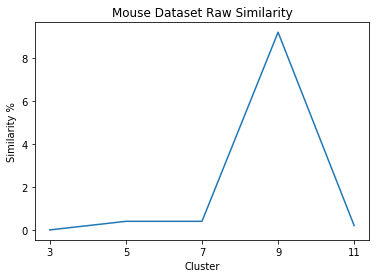

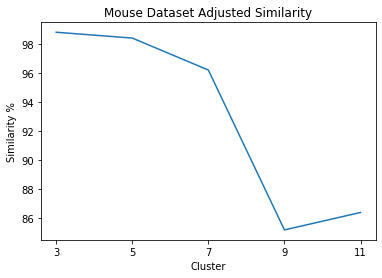

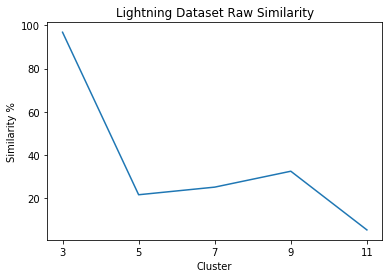

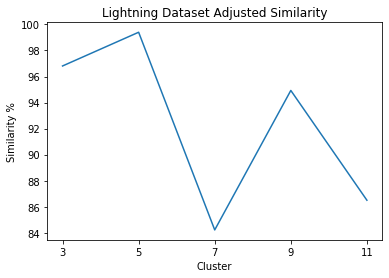

In [11]:
# THIS IS ONLY CAUSE AEON FUCKED UP AND FORGOT TO MAKE A DICT
# THAT RECORDED THIS AUTOMATICALLY
# you should use similarities and adjusted_similarities dicts for this
sim = [[3,0],[5,0.4],[7,0.4],[9,9.2],[11,0.2]]
adj_sim = [[3,98.8],[5,98.4],[7,96.2],[9,85.2],[11,86.4]]
x = [val[0] for val in sim]
y = [val[1] for val in sim]
plt.xticks(np.arange(3,12,2))
plt.title("Mouse Dataset Raw Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()
x = [val[0] for val in adj_sim]
y = [val[1] for val in adj_sim]
plt.xticks(np.arange(3,12,2))
plt.title("Mouse Dataset Adjusted Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()

sim = [[3,96.81],[5,21.5],[7,25.03],[9,32.4],[11,5.2]]
adj_sim = [[3,96.81],[5,99.4],[7,84.22],[9,94.93],[11,86.5]]
x = [val[0] for val in sim]
y = [val[1] for val in sim]
plt.xticks(np.arange(3,12,2))
plt.title("Lightning Dataset Raw Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()
x = [val[0] for val in adj_sim]
y = [val[1] for val in adj_sim]
plt.xticks(np.arange(3,12,2))
plt.title("Lightning Dataset Adjusted Similarity")
plt.xlabel("Cluster")
plt.ylabel("Similarity %")
plt.plot(x,y)
plt.show()